In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF = pd.read_csv('311_Service_Requests_for_Fiscal_Year_2020_-_2021_Street.csv')
DF.head()

,SERVICE_REQUEST_NUMBER,ADDRESS,CITY_COUNCIL_DISTRICT,DEPARTMENT,SERVICE_REQUEST_TYPE,ERT(ESTIMATED_RESPONSE_TIME),ERT_MEASURED_IN,OVERALL_SERVICE_REQUEST_DUE_DATE,STATUS,CREATED_DATE,UPDATED_DATE,CLOSED_DATE,OUTCOME,PRIORITY,METHOD_RECEIVED_DESC,LAT_LONG_VALUE,UNIQUE_KEY
0,21-00569134,"3011 MESA VIEW DR, DALLAS, TX, 75241",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,08/24/2021 10:59:00 PM,Closed,06/21/2021 02:22:53 PM,06/12/2023 12:05:36 AM,06/21/2021 02:22:53 PM,Work Completed,Standard,Phone,"(32.66105802876609000,-96.77382788939164000)",500t000000nOZNjAAO
1,21-00495804,"3207 LATHAM DR, DALLAS, TX, 75229",13.0,Public Works,Alley/Sidewalk/Street Repair - Hazardous - PBW,1 Calendar Days,Calendar Days,06/02/2021 10:59:00 PM,Closed (Transferred),06/01/2021 01:28:19 PM,06/08/2023 11:52:08 PM,06/01/2021 01:28:19 PM,Request Transferred,Dispatch,Phone,"(32.89706478831329400,-96.86989385733273000)",500t000000miAl9AAE
2,21-00511445,"3045 LEAHY DR, DALLAS, TX, 75229",13.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,08/09/2021 10:59:00 PM,Closed,06/06/2021 09:59:53 AM,06/09/2023 12:06:31 AM,06/06/2021 09:59:53 AM,Work Not Completed,Standard,API,"(32.89623688868438000,-96.87689859194490000)",500t000000mjs6DAAQ
3,21-00798662,"2847 LEBROCK ST, DALLAS, TX, 75241",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,11/02/2021 10:59:00 PM,Closed,08/30/2021 07:44:20 AM,06/08/2023 11:20:35 PM,08/30/2021 07:44:20 AM,Work Completed,Standard,Phone,"(32.67005094952952500,-96.77462698601258000)",500t000000qVzwuAAC
4,20-01211235,"NUESTRA DR & RIDGETOWN CIR, DALLAS, TX, 75230",13.0,Public Works,Street Spillage/Debris in Right of Way - Hazar...,1 Calendar Days,Calendar Days,12/18/2020 11:59:00 PM,Closed,12/17/2020 08:59:13 AM,06/09/2023 02:08:49 AM,12/17/2020 08:59:13 AM,Work Could not be Completed,Dispatch,Phone,"(32.91169641749964000,-96.81174957714990000)",500t000000dGav7AAC


In [3]:
print(DF.columns)

Index(['SERVICE_REQUEST_NUMBER', 'ADDRESS', 'CITY_COUNCIL_DISTRICT',
       'DEPARTMENT', 'SERVICE_REQUEST_TYPE', 'ERT(ESTIMATED_RESPONSE_TIME)',
       'ERT_MEASURED_IN', 'OVERALL_SERVICE_REQUEST_DUE_DATE', 'STATUS',
       'CREATED_DATE', 'UPDATED_DATE', 'CLOSED_DATE', 'OUTCOME', 'PRIORITY',
       'METHOD_RECEIVED_DESC', 'LAT_LONG_VALUE', 'UNIQUE_KEY'],
      dtype='object')


In [4]:
print(DF.describe())

       CITY_COUNCIL_DISTRICT
count           10945.000000
mean                7.687620
std                 4.167861
min                 1.000000
25%                 4.000000
50%                 7.000000
75%                12.000000
max                14.000000


In [5]:
print(DF.shape)

(10968, 17)


In [6]:
missing_values = DF.isnull().sum()
print(missing_values)

SERVICE_REQUEST_NUMBER                0
ADDRESS                               0
CITY_COUNCIL_DISTRICT                23
DEPARTMENT                            0
SERVICE_REQUEST_TYPE                  0
ERT(ESTIMATED_RESPONSE_TIME)         38
ERT_MEASURED_IN                      38
OVERALL_SERVICE_REQUEST_DUE_DATE      0
STATUS                                0
CREATED_DATE                          0
UPDATED_DATE                          0
CLOSED_DATE                           0
OUTCOME                             660
PRIORITY                              0
METHOD_RECEIVED_DESC                  0
LAT_LONG_VALUE                        0
UNIQUE_KEY                            0
dtype: int64


In [7]:
duplicate_rows = DF[DF.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [13]:
DF = DF.dropna()
DF.shape

(10907, 17)

In [14]:
missing_values = DF.isnull().sum()
print(missing_values)

SERVICE_REQUEST_NUMBER              0
ADDRESS                             0
CITY_COUNCIL_DISTRICT               0
DEPARTMENT                          0
SERVICE_REQUEST_TYPE                0
ERT(ESTIMATED_RESPONSE_TIME)        0
ERT_MEASURED_IN                     0
OVERALL_SERVICE_REQUEST_DUE_DATE    0
STATUS                              0
CREATED_DATE                        0
UPDATED_DATE                        0
CLOSED_DATE                         0
OUTCOME                             0
PRIORITY                            0
METHOD_RECEIVED_DESC                0
LAT_LONG_VALUE                      0
UNIQUE_KEY                          0
dtype: int64


In [15]:
print(DF['STATUS'].unique())

['Closed' 'Closed (Transferred)' 'Closed (Duplicate)' 'In Progress']


In [16]:
print(DF['OUTCOME'].unique())

['Work Completed' 'Request\xa0Transferred' 'Work Not Completed'
 'Work Could not be Completed' 'Information Provided' 'Unknown'
 'No Action Required' 'Request Documented' 'Investigation Complete']


In [23]:
DF['LAT_LONG_VALUE'] = DF['LAT_LONG_VALUE'].str.replace('(', '').str.replace(')', '').str.strip()
split_columns = DF['LAT_LONG_VALUE'].str.split(',', expand=True)
print(DF)
# Convert the new columns from string to float, if necessary
DF['LATITUDE'] =  split_columns[0].str.strip().astype(float)
DF['LONGITUDE'] =  split_columns[1].str.strip().astype(float)

      SERVICE_REQUEST_NUMBER  \
0                21-00569134   
1                21-00495804   
2                21-00511445   
3                21-00798662   
4                20-01211235   
...                      ...   
10963            21-00639884   
10964            21-00628407   
10965            21-00643999   
10966            21-00636200   
10967            21-00641590   

                                                ADDRESS  \
0                  3011 MESA VIEW DR, DALLAS, TX, 75241   
1                     3207 LATHAM DR, DALLAS, TX, 75229   
2                      3045 LEAHY DR, DALLAS, TX, 75229   
3                    2847 LEBROCK ST, DALLAS, TX, 75241   
4         NUESTRA DR & RIDGETOWN CIR, DALLAS, TX, 75230   
...                                                 ...   
10963  6099 GREAT TRINITY FOREST WAY, DALLAS, TX, 75217   
10964              14311 SKYFROST DR, DALLAS, TX, 75253   
10965         MATILDA ST & MILTON ST, DALLAS, TX, 75206   
10966          2600 BECKL

In [24]:
DF

,SERVICE_REQUEST_NUMBER,ADDRESS,CITY_COUNCIL_DISTRICT,DEPARTMENT,SERVICE_REQUEST_TYPE,ERT(ESTIMATED_RESPONSE_TIME),ERT_MEASURED_IN,OVERALL_SERVICE_REQUEST_DUE_DATE,STATUS,CREATED_DATE,UPDATED_DATE,CLOSED_DATE,OUTCOME,PRIORITY,METHOD_RECEIVED_DESC,LAT_LONG_VALUE,UNIQUE_KEY,LATITUDE,LONGITUDE
0,21-00569134,"3011 MESA VIEW DR, DALLAS, TX, 75241",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,08/24/2021 10:59:00 PM,Closed,06/21/2021 02:22:53 PM,06/12/2023 12:05:36 AM,06/21/2021 02:22:53 PM,Work Completed,Standard,Phone,"32.66105802876609000,-96.77382788939164000",500t000000nOZNjAAO,32.661058,-96.773828
1,21-00495804,"3207 LATHAM DR, DALLAS, TX, 75229",13.0,Public Works,Alley/Sidewalk/Street Repair - Hazardous - PBW,1 Calendar Days,Calendar Days,06/02/2021 10:59:00 PM,Closed (Transferred),06/01/2021 01:28:19 PM,06/08/2023 11:52:08 PM,06/01/2021 01:28:19 PM,Request Transferred,Dispatch,Phone,"32.89706478831329400,-96.86989385733273000",500t000000miAl9AAE,32.897065,-96.869894
2,21-00511445,"3045 LEAHY DR, DALLAS, TX, 75229",13.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,08/09/2021 10:59:00 PM,Closed,06/06/2021 09:59:53 AM,06/09/2023 12:06:31 AM,06/06/2021 09:59:53 AM,Work Not Completed,Standard,API,"32.89623688868438000,-96.87689859194490000",500t000000mjs6DAAQ,32.896237,-96.876899
3,21-00798662,"2847 LEBROCK ST, DALLAS, TX, 75241",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,11/02/2021 10:59:00 PM,Closed,08/30/2021 07:44:20 AM,06/08/2023 11:20:35 PM,08/30/2021 07:44:20 AM,Work Completed,Standard,Phone,"32.67005094952952500,-96.77462698601258000",500t000000qVzwuAAC,32.670051,-96.774627
4,20-01211235,"NUESTRA DR & RIDGETOWN CIR, DALLAS, TX, 75230",13.0,Public Works,Street Spillage/Debris in Right of Way - Hazar...,1 Calendar Days,Calendar Days,12/18/2020 11:59:00 PM,Closed,12/17/2020 08:59:13 AM,06/09/2023 02:08:49 AM,12/17/2020 08:59:13 AM,Work Could not be Completed,Dispatch,Phone,"32.91169641749964000,-96.81174957714990000",500t000000dGav7AAC,32.911696,-96.811750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10963,21-00639884,"6099 GREAT TRINITY FOREST WAY, DALLAS, TX, 75217",7.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,09/13/2021 10:59:00 PM,Closed,07/11/2021 07:46:22 PM,06/08/2023 11:46:58 PM,07/11/2021 07:46:22 PM,Work Not Completed,Standard,API,"32.71291552556903000,-96.71736991033755000",500t000000o1nsEAAQ,32.712916,-96.717370
10964,21-00628407,"14311 SKYFROST DR, DALLAS, TX, 75253",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,09/09/2021 10:59:00 PM,Closed,07/07/2021 03:10:46 PM,06/12/2023 12:12:18 AM,07/07/2021 03:10:46 PM,No Action Required,Standard,API,"32.68420964534199000,-96.57451512772228000",500t000000o09EKAAY,32.684210,-96.574515
10965,21-00643999,"MATILDA ST & MILTON ST, DALLAS, TX, 75206",14.0,Public Works,Alley/Sidewalk/Street Repair - Hazardous - PBW,1 Calendar Days,Calendar Days,07/13/2021 10:59:00 PM,Closed,07/12/2021 05:26:37 PM,06/08/2023 11:37:53 PM,07/12/2021 05:26:37 PM,Work Could not be Completed,Dispatch,Phone,"32.84881320431992400,-96.76802407941537000",500t000000o2MMgAAM,32.848813,-96.768024
10966,21-00636200,"2600 BECKLEYMEADE AVE, DALLAS, TX, 75237",8.0,Public Works,Street Repair - Routine - PBW,10 Business Days,Business Days,09/13/2021 10:59:00 PM,Closed,07/09/2021 02:20:07 PM,06/08/2023 11:46:19 PM,07/09/2021 02:20:07 PM,Work Completed,Standard,API,"32.64014568313779600,-96.86224897200503000",500t000000o1DE0AAM,32.640146,-96.862249


In [29]:
DF.drop('LAT_LONG_VALUE', axis = 1, inplace = True)
DF.columns

Index(['SERVICE_REQUEST_NUMBER', 'ADDRESS', 'CITY_COUNCIL_DISTRICT',
       'DEPARTMENT', 'SERVICE_REQUEST_TYPE', 'ERT(ESTIMATED_RESPONSE_TIME)',
       'ERT_MEASURED_IN', 'OVERALL_SERVICE_REQUEST_DUE_DATE', 'STATUS',
       'CREATED_DATE', 'UPDATED_DATE', 'CLOSED_DATE', 'OUTCOME', 'PRIORITY',
       'METHOD_RECEIVED_DESC', 'UNIQUE_KEY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [30]:
DF.to_csv('311_service_cleaned.csv', index=False)

In [33]:

# Setting up the visualizations environment
sns.set(style="whitegrid")

# Preparing data for plotting
DF['CREATED_DATE'] = pd.to_datetime(DF['CREATED_DATE'])
DF['MONTH'] = DF['CREATED_DATE'].dt.month_name()
DF['YEAR'] = DF['CREATED_DATE'].dt.year


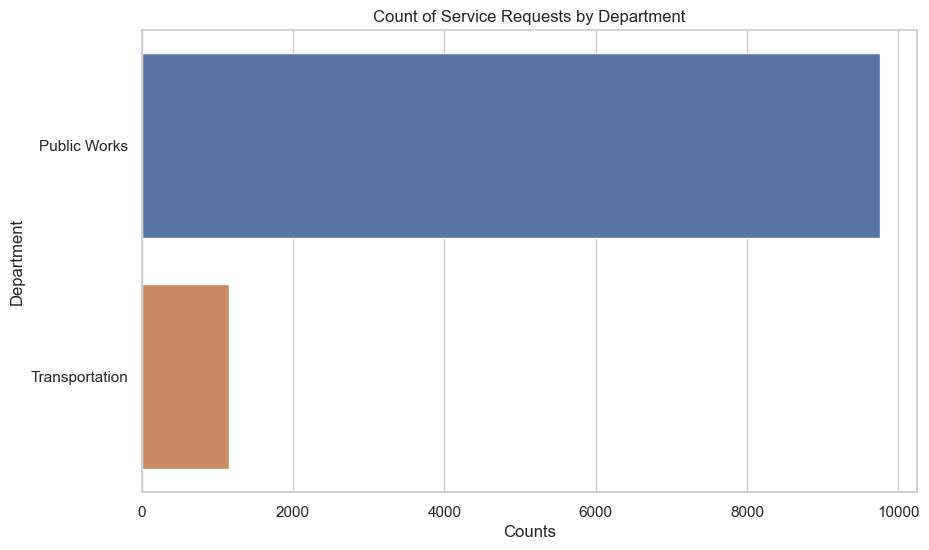

In [39]:
# Plot 1: Count of Service Requests by Department
plt.figure(figsize=(10, 6))
sns.countplot(y='DEPARTMENT', data=DF, order=DF['DEPARTMENT'].value_counts().index)
plt.title('Count of Service Requests by Department')
plt.xlabel('Counts')
plt.ylabel('Department')
plt.show()

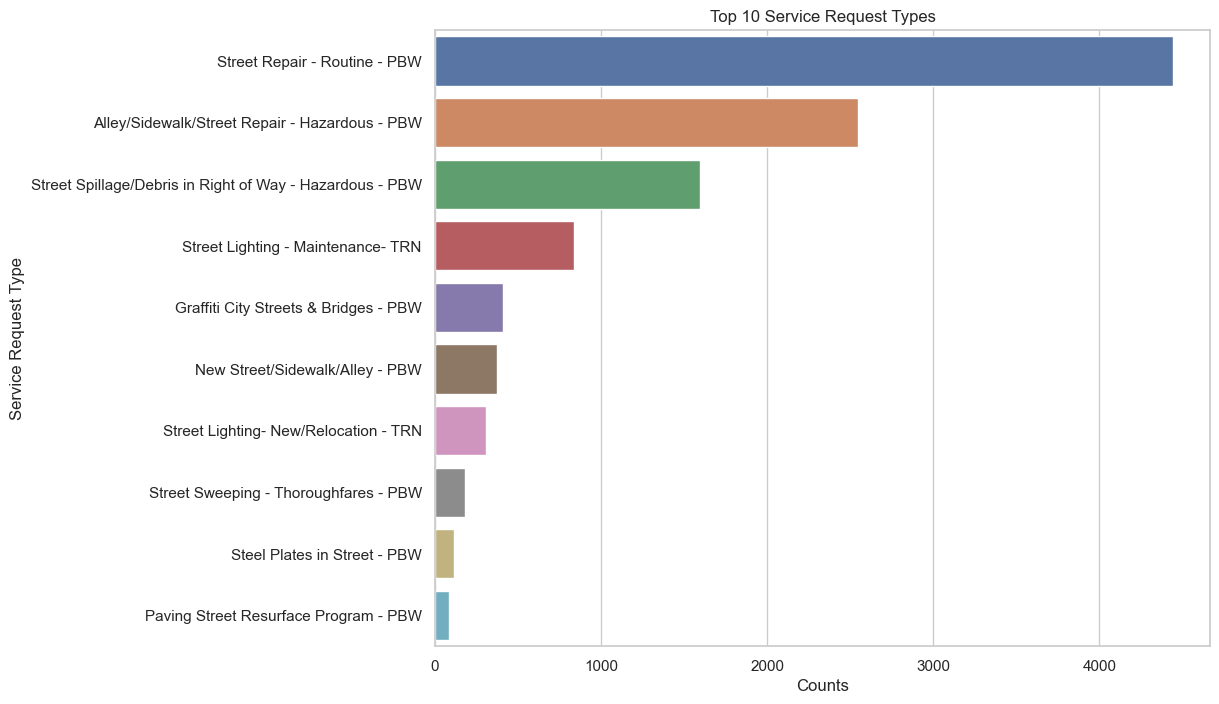

In [41]:
# Plot 2: Service Request Types Frequency
plt.figure(figsize=(10, 8))
top_types = DF['SERVICE_REQUEST_TYPE'].value_counts().nlargest(10)
sns.barplot(y=top_types.index, x=top_types.values)
plt.title('Top 10 Service Request Types')
plt.xlabel('Counts')
plt.ylabel('Service Request Type')
plt.show()

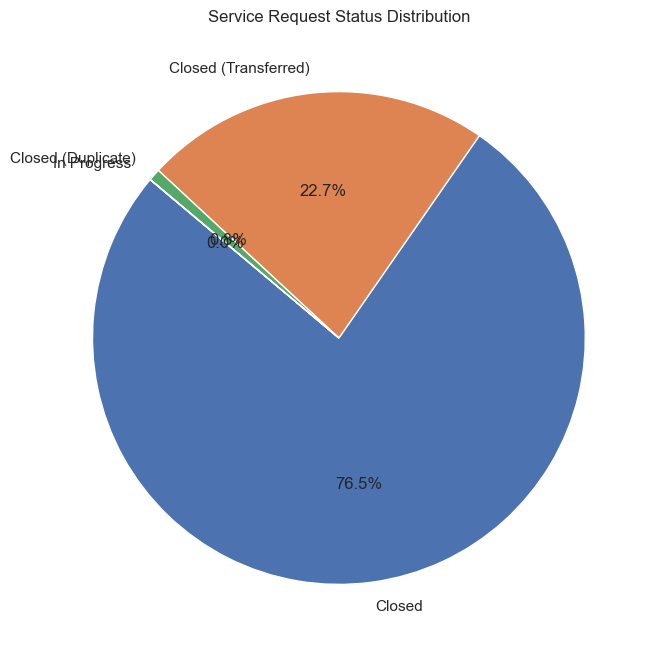

In [43]:
# Plot 3: Service Request Status Distribution
plt.figure(figsize=(8, 8))
status_counts = DF['STATUS'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Service Request Status Distribution')
plt.show()

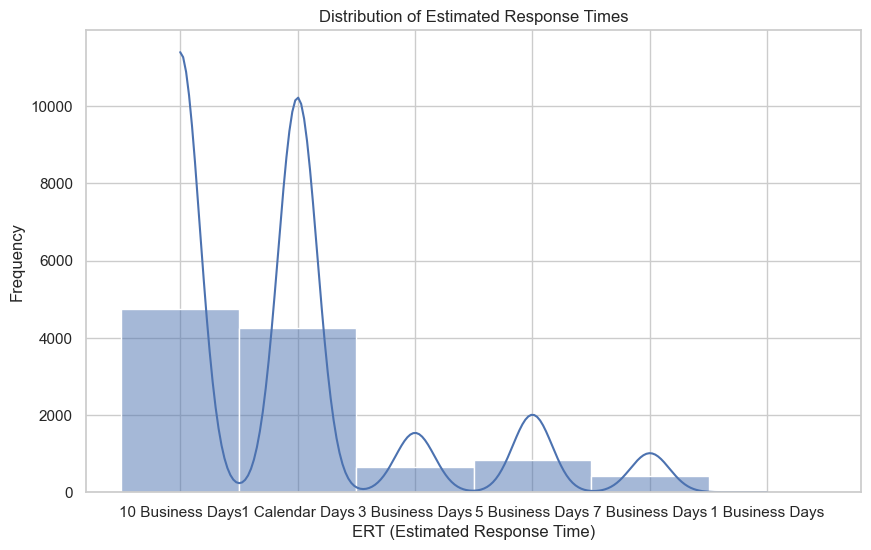

In [44]:
# Plot 4: Service Request Response Times
plt.figure(figsize=(10, 6))
sns.histplot(DF['ERT(ESTIMATED_RESPONSE_TIME)'], bins=30, kde=True)
plt.title('Distribution of Estimated Response Times')
plt.xlabel('ERT (Estimated Response Time)')
plt.ylabel('Frequency')
plt.show()

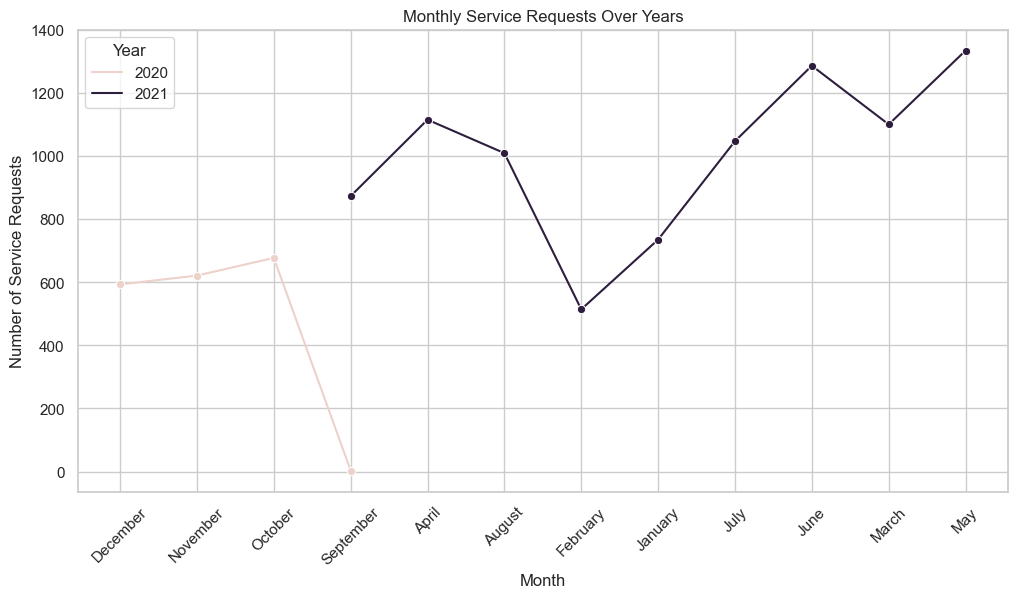

In [45]:
# Plot 5: Service Requests Over Time
plt.figure(figsize=(12, 6))
monthly_counts = DF.groupby(['YEAR', 'MONTH']).size().reset_index(name='counts')
sns.lineplot(data=monthly_counts, x='MONTH', y='counts', hue='YEAR', marker='o')
plt.title('Monthly Service Requests Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Service Requests')
plt.legend(title='Year')
plt.xticks(rotation=45)  # Rotate the month labels for better visibility
plt.show()

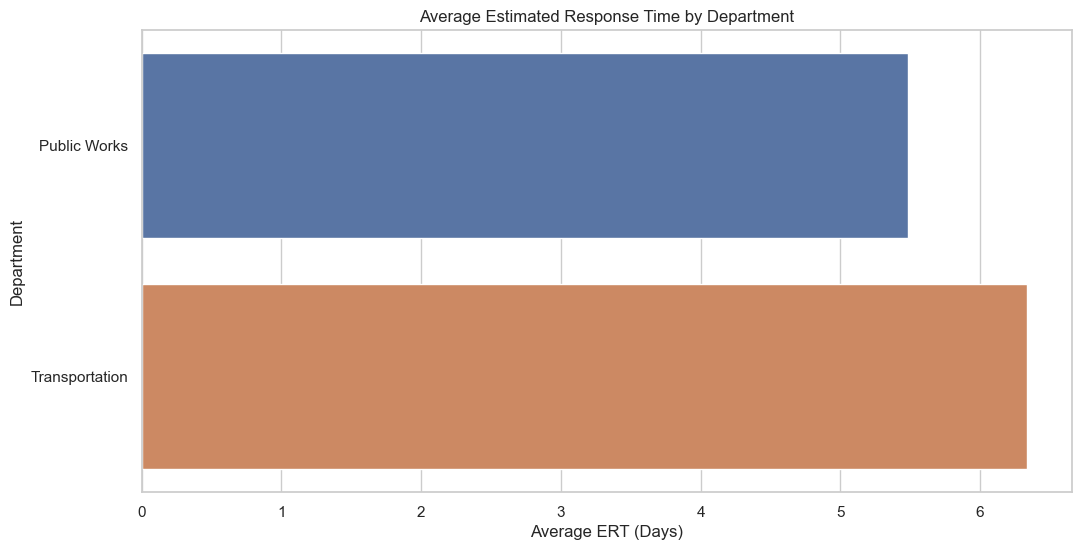

In [47]:
DF['ERT_NUMERIC'] = DF['ERT(ESTIMATED_RESPONSE_TIME)'].str.extract('(\d+)').astype(float)

# Plot 6: Average Response Time by Department
plt.figure(figsize=(12, 6))
avg_ert_by_dept = DF.groupby('DEPARTMENT')['ERT_NUMERIC'].mean().sort_values()
sns.barplot(x=avg_ert_by_dept.values, y=avg_ert_by_dept.index)
plt.title('Average Estimated Response Time by Department')
plt.xlabel('Average ERT (Days)')
plt.ylabel('Department')
plt.show()


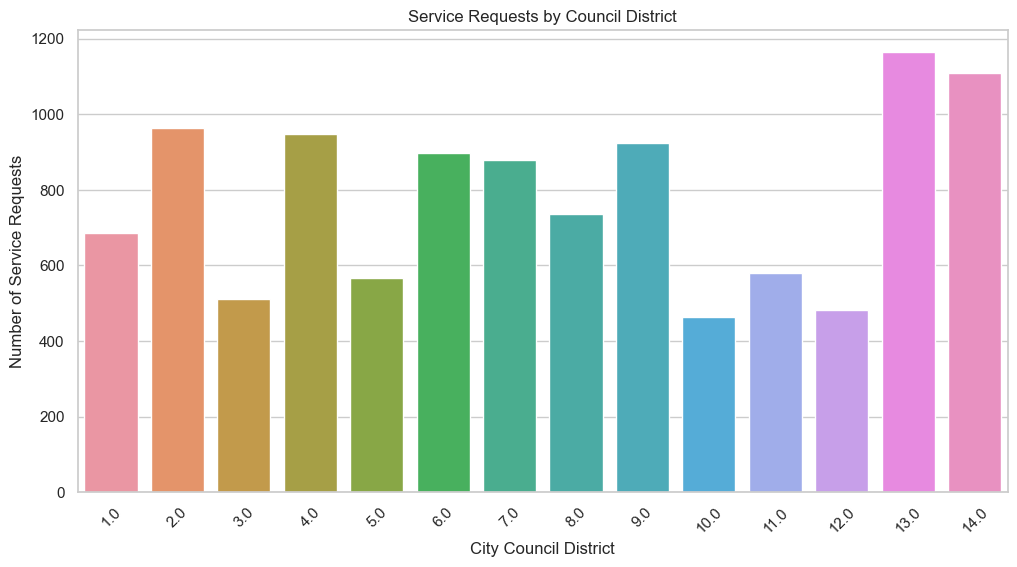

In [48]:
# Plot 7: Service Requests by Council District
plt.figure(figsize=(12, 6))
district_counts = DF['CITY_COUNCIL_DISTRICT'].value_counts().sort_index()
sns.barplot(x=district_counts.index, y=district_counts.values)
plt.title('Service Requests by Council District')
plt.xlabel('City Council District')
plt.ylabel('Number of Service Requests')
plt.xticks(rotation=45)  # Rotate the district labels for better visibility
plt.show()


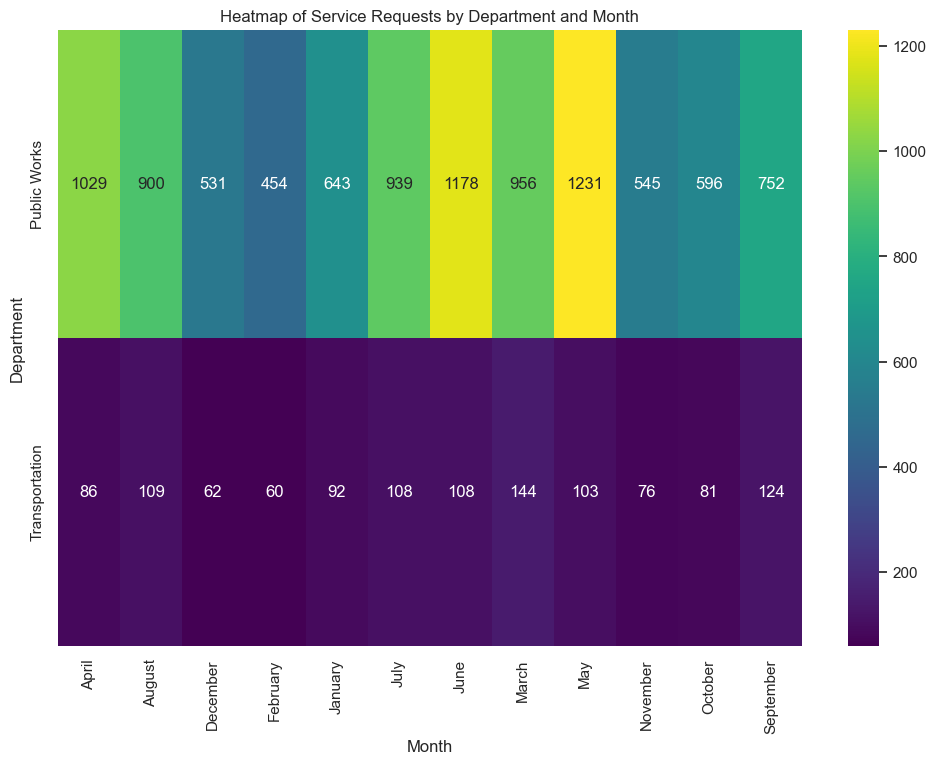

In [49]:
# Creating a pivot table for the heatmap
heatmap_data = DF.pivot_table(index='DEPARTMENT', columns='MONTH', values='SERVICE_REQUEST_NUMBER', aggfunc='count', fill_value=0)

# plot 8: Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of Service Requests by Department and Month')
plt.xlabel('Month')
plt.ylabel('Department')
plt.show()


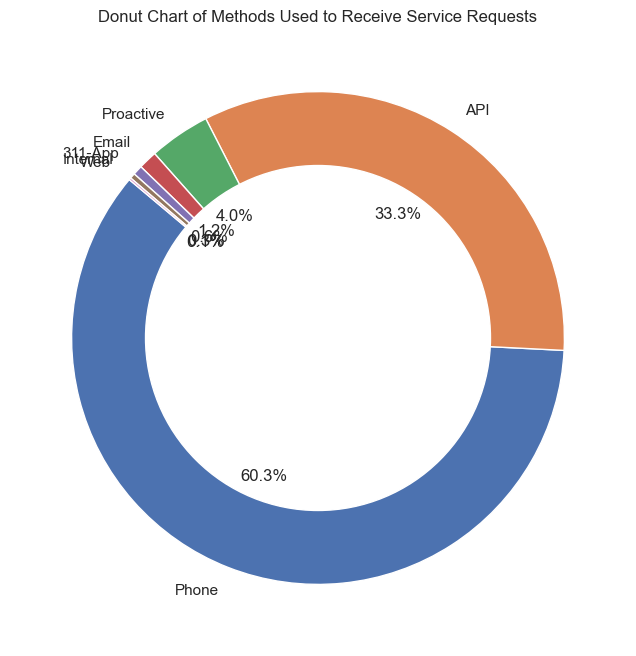

In [50]:
#plot 9: Counting the methods used to receive service requests
method_counts = DF['METHOD_RECEIVED_DESC'].value_counts()

# Creating a donut chart
plt.figure(figsize=(8, 8))
plt.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', startangle=140)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Adding the white circle in the middle
plt.title('Donut Chart of Methods Used to Receive Service Requests')
plt.show()
